In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
# importing library for dealing ipaddress
import ipaddress
from ipaddress import IPv4Address
# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
# representation of model layers
from keras.utils.vis_utils import plot_model

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/content/gdrive/My Drive/NF-CSE-CIC-IDS2018.csv')
df

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,172.31.66.17,51128,23.36.69.189,443,6,91.000,152,0,3,0,194,4285680,0,Benign
1,34.195.59.178,443,172.31.66.17,51036,6,91.178,994,979,7,7,24,4234714,0,Benign
2,112.215.171.212,12262,172.31.66.17,445,6,0.000,585,344,5,4,30,4294106,0,Benign
3,172.31.66.17,61023,172.31.0.2,53,17,0.000,136,168,2,2,0,4293985,0,Benign
4,34.204.112.168,443,172.31.66.17,51037,6,91.178,72,40,1,1,24,4294845,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392396,172.31.69.7,22,122.226.181.164,40810,6,0.000,2601,0,12,0,27,0,0,Benign
8392397,45.70.167.112,15476,172.31.69.7,23,6,0.000,44,0,1,0,2,0,0,Benign
8392398,172.31.69.7,23,45.70.167.112,15476,6,0.000,40,0,1,0,20,0,0,Benign
8392399,172.31.69.7,56407,172.31.0.2,53,17,0.000,72,0,1,0,0,0,0,Benign


In [ ]:
df.drop(df.index[1844166],axis=0,inplace=True)
df.drop(df.index[7795208],axis=0,inplace=True)
df.drop(['Label'],axis=1,inplace=True)
df

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Attack
0,172.31.66.17,51128,23.36.69.189,443,6,91.000,152,0,3,0,194,4285680,Benign
1,34.195.59.178,443,172.31.66.17,51036,6,91.178,994,979,7,7,24,4234714,Benign
2,112.215.171.212,12262,172.31.66.17,445,6,0.000,585,344,5,4,30,4294106,Benign
3,172.31.66.17,61023,172.31.0.2,53,17,0.000,136,168,2,2,0,4293985,Benign
4,34.204.112.168,443,172.31.66.17,51037,6,91.178,72,40,1,1,24,4294845,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392396,172.31.69.7,22,122.226.181.164,40810,6,0.000,2601,0,12,0,27,0,Benign
8392397,45.70.167.112,15476,172.31.69.7,23,6,0.000,44,0,1,0,2,0,Benign
8392398,172.31.69.7,23,45.70.167.112,15476,6,0.000,40,0,1,0,20,0,Benign
8392399,172.31.69.7,56407,172.31.0.2,53,17,0.000,72,0,1,0,0,0,Benign


In [ ]:
df.columns


Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Attack'],
      dtype='object')

In [ ]:
df.dtypes

IPV4_SRC_ADDR                  object
L4_SRC_PORT                     int64
IPV4_DST_ADDR                  object
L4_DST_PORT                     int64
PROTOCOL                        int64
L7_PROTO                      float64
IN_BYTES                        int64
OUT_BYTES                       int64
IN_PKTS                         int64
OUT_PKTS                        int64
TCP_FLAGS                       int64
FLOW_DURATION_MILLISECONDS      int64
Attack                         object
dtype: object

In [ ]:
df.Attack.value_counts()

Benign                      7373196
DDoS attacks-LOIC-HTTP       378199
FTP-BruteForce               193360
DoS attacks-Hulk             108136
DoS attacks-SlowHTTPTest     105550
SSH-Bruteforce                94237
Infilteration                 62072
DoS attacks-GoldenEye         32850
DoS attacks-Slowloris         22825
Bot                           15683
Brute Force -Web               2613
Brute Force -XSS               1745
DDOS attack-LOIC-UDP           1667
DDOS attack-HOIC                230
SQL Injection                    36
Name: Attack, dtype: int64

In [ ]:
def change_label(df):
  df.Attack.replace(['DDoS attacks-LOIC-HTTP', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'DoS attacks-GoldenEye', 
                    'DoS attacks-Slowloris', 'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC'],'Dos',inplace=True)
  df.Attack.replace(['FTP-BruteForce', 'SSH-Bruteforce', 'Brute Force -Web'],'Probe',inplace=True)
  df.Attack.replace(['SQL Injection', 'Brute Force -XSS'],'U2R',inplace=True)
  df.Attack.replace(['Benign'],'Normal',inplace=True)
  df.Attack.replace(['Bot', 'Infilteration'],'R2L',inplace=True)
change_label(df)
df.Attack.value_counts()

Normal    7373196
Dos        649457
Probe      290210
R2L         77755
U2R          1781
Name: Attack, dtype: int64

In [ ]:
#df.drop(df.loc[df['Attack'] == 'Normal'].index[:6500000],axis=0,inplace=True)

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(", ".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,\
                int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])
analyze(df)


8392399 rows
** IPV4_SRC_ADDR:75404 (0%)
** L4_SRC_PORT:65010 (0%)
** IPV4_DST_ADDR:26301 (0%)
** L4_DST_PORT:65092 (0%)
** PROTOCOL:[6:73.54%, 17:25.86%, 1:0.46%, 2:0.07%, 58:0.07%, 47:0.0%, 0:0.0%]
** L7_PROTO:237 (0%)
** IN_BYTES:34677 (0%)
** OUT_BYTES:66601 (0%)
** IN_PKTS:4659 (0%)
** OUT_PKTS:2839 (0%)
** TCP_FLAGS:[0:26.46%, 27:11.14%, 20:10.11%, 222:9.33%, 219:8.97%, 2:6.95%, 24:6.58%, 30:5.69%, 218:3.2%, 223:1.97%, 25:1.76%, 23:1.63%, 31:1.31%, 26:1.17%, 17:0.87%, 29:0.62%, 22:0.38%, 211:0.35%, 214:0.31%, 18:0.27%, 28:0.24%, 16:0.19%, 194:0.14%, 19:0.08%, 6:0.08%, 4:0.07%, 21:0.03%, 215:0.02%, 210:0.02%, 90:0.02%, 91:0.01%, 148:0.0%, 157:0.0%, 10:0.0%, 152:0.0%, 83:0.0%, 41:0.0%, 208:0.0%, 94:0.0%, 156:0.0%, 43:0.0%, 82:0.0%, 149:0.0%, 86:0.0%, 61:0.0%, 153:0.0%, 198:0.0%, 158:0.0%]
** FLOW_DURATION_MILLISECONDS:80199 (0%)
** Attack:[Normal:87.86%, Dos:7.74%, Probe:3.46%, R2L:0.93%, U2R:0.02%]


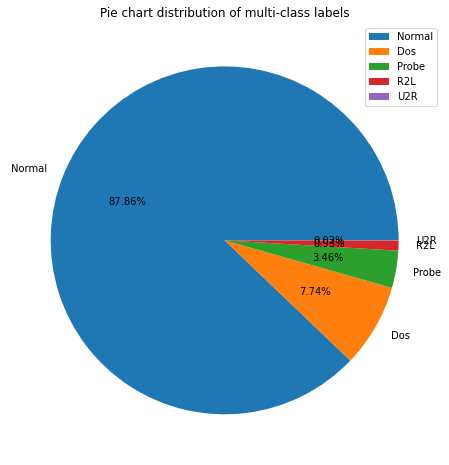

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df.Attack.value_counts(),labels=['Normal', 'Dos', 'Probe', 'R2L', 'U2R'],autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.show()

# Data Standardization

In [ ]:
def IP_deal(df, len):
    arr1 = df.IPV4_SRC_ADDR; arr2 = df.IPV4_DST_ADDR
    arr1 = np.array(arr1)
    arr2 = np.array(arr2)
    for i in range(len):
      try:
        arr1[i] = int(ipaddress.IPv4Address(arr1[i]))
        arr2[i] = int(ipaddress.IPv4Address(arr2[i]))
      except:
        print(arr1[i], i)
        print(arr2[i], i)
    df.IPV4_SRC_ADDR = arr1.reshape(len,1)
    df.IPV4_DST_ADDR = arr2.reshape(len,1)
    return df

df = IP_deal(df, df.shape[0])
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Attack
0,2887729681,51128,388253117,443,6,91.000,152,0,3,0,194,4285680,Normal
1,583220146,443,2887729681,51036,6,91.178,994,979,7,7,24,4234714,Normal
2,1893182420,12262,2887729681,445,6,0.000,585,344,5,4,30,4294106,Normal
3,2887729681,61023,2887712770,53,17,0.000,136,168,2,2,0,4293985,Normal
4,583823528,443,2887729681,51037,6,91.178,72,40,1,1,24,4294845,Normal


In [ ]:
numeric_col = df.select_dtypes(include='number').columns
numeric_col

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS'],
      dtype='object')

In [ ]:
df.dtypes

IPV4_SRC_ADDR                  object
L4_SRC_PORT                     int64
IPV4_DST_ADDR                  object
L4_DST_PORT                     int64
PROTOCOL                        int64
L7_PROTO                      float64
IN_BYTES                        int64
OUT_BYTES                       int64
IN_PKTS                         int64
OUT_PKTS                        int64
TCP_FLAGS                       int64
FLOW_DURATION_MILLISECONDS      int64
Attack                         object
dtype: object

In [ ]:
df.IPV4_SRC_ADDR = pd.to_numeric(df.IPV4_SRC_ADDR)
df.IPV4_DST_ADDR = pd.to_numeric(df.IPV4_DST_ADDR)
df.dtypes

IPV4_SRC_ADDR                   int64
L4_SRC_PORT                     int64
IPV4_DST_ADDR                   int64
L4_DST_PORT                     int64
PROTOCOL                        int64
L7_PROTO                      float64
IN_BYTES                        int64
OUT_BYTES                       int64
IN_PKTS                         int64
OUT_PKTS                        int64
TCP_FLAGS                       int64
FLOW_DURATION_MILLISECONDS      int64
Attack                         object
dtype: object

In [ ]:

numeric_col = df.select_dtypes(include='number').columns

std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

data = normalization(df.copy(),numeric_col)
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Attack
0,0.451583,0.390872,-1.984851,-0.453166,-0.570071,2.018235,-0.027630,-0.016851,-0.018695,-0.033282,1.458887,0.715855,Normal
1,-1.777374,-1.911674,0.445502,2.425899,-0.570071,2.023228,-0.021185,-0.013056,-0.016641,0.006210,-0.450245,0.690752,Normal
2,-0.510359,-1.374754,0.445502,-0.453052,-0.570071,-0.534687,-0.024316,-0.015518,-0.017668,-0.010715,-0.382864,0.720005,Normal
3,0.451583,0.840388,0.445486,-0.475359,1.627920,-0.534687,-0.027753,-0.016200,-0.019208,-0.021998,-0.719770,0.719945,Normal
4,-1.776791,-1.911674,0.445502,2.425956,-0.570071,2.023228,-0.028243,-0.016696,-0.019721,-0.027640,-0.450245,0.720369,Normal


In [ ]:
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.Attack)

le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#np.save("/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/labels/le2_classes.npy",le2.classes_,allow_pickle=True)

multi_data = pd.get_dummies(multi_data,columns=['Attack'],prefix="",prefix_sep="") 
multi_data['Attack'] = multi_label
multi_data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,intrusion,Dos,Normal,Probe,R2L,U2R,Attack
0,0.451583,0.390872,-1.984851,-0.453166,-0.570071,2.018235,-0.027630,-0.016851,-0.018695,-0.033282,1.458887,0.715855,1,0,1,0,0,0,Normal
1,-1.777374,-1.911674,0.445502,2.425899,-0.570071,2.023228,-0.021185,-0.013056,-0.016641,0.006210,-0.450245,0.690752,1,0,1,0,0,0,Normal
2,-0.510359,-1.374754,0.445502,-0.453052,-0.570071,-0.534687,-0.024316,-0.015518,-0.017668,-0.010715,-0.382864,0.720005,1,0,1,0,0,0,Normal
3,0.451583,0.840388,0.445486,-0.475359,1.627920,-0.534687,-0.027753,-0.016200,-0.019208,-0.021998,-0.719770,0.719945,1,0,1,0,0,0,Normal
4,-1.776791,-1.911674,0.445502,2.425956,-0.570071,2.023228,-0.028243,-0.016696,-0.019721,-0.027640,-0.450245,0.720369,1,0,1,0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392396,0.451583,-1.930799,-0.357705,1.843975,-0.570071,-0.534687,-0.008883,-0.016851,-0.014075,-0.033282,-0.416555,-1.395058,1,0,1,0,0,0,Normal
8392397,-1.606772,-1.228746,0.445503,-0.477066,-0.570071,-0.534687,-0.028457,-0.016851,-0.019721,-0.033282,-0.697310,-1.395058,1,0,1,0,0,0,Normal
8392398,0.451583,-1.930754,-1.623769,0.402308,-0.570071,-0.534687,-0.028488,-0.016851,-0.019721,-0.033282,-0.495166,-1.395058,1,0,1,0,0,0,Normal
8392399,0.451583,0.630689,0.445486,-0.475359,1.627920,-0.534687,-0.028243,-0.016851,-0.019721,-0.033282,-0.719770,-1.395058,1,0,1,0,0,0,Normal


In [ ]:
multi_data.intrusion.value_counts()

1    7373196
0     649457
2     290210
3      77755
4       1781
Name: intrusion, dtype: int64

# Feature Extraction

In [ ]:
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']

corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y > 0.1]
highest_corr.sort_values(ascending=True)


<ipython-input-18-2fbbef84d961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['intrusion'] = multi_data['intrusion']


TCP_FLAGS                     0.144202
FLOW_DURATION_MILLISECONDS    0.182597
IPV4_SRC_ADDR                 0.233399
intrusion                     1.000000
Name: intrusion, dtype: float64

In [ ]:

#numerical_data = multi_data[['L4_SRC_PORT', 'L7_PROTO', 'L4_DST_PORT', 'PROTOCOL', 'FLOW_DURATION_MILLISECONDS']]
#multi_data = numerical_data.join(multi_data[['intrusion', 'R2L', 'Dos', 'Normal', 'Probe', 'U2R', 'Attack']])
multi_data.rename(columns={'Attack':'Label'}, inplace=True)
multi_data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,intrusion,Dos,Normal,Probe,R2L,U2R,Label
0,0.451583,0.390872,-1.984851,-0.453166,-0.570071,2.018235,-0.027630,-0.016851,-0.018695,-0.033282,1.458887,0.715855,1,0,1,0,0,0,Normal
1,-1.777374,-1.911674,0.445502,2.425899,-0.570071,2.023228,-0.021185,-0.013056,-0.016641,0.006210,-0.450245,0.690752,1,0,1,0,0,0,Normal
2,-0.510359,-1.374754,0.445502,-0.453052,-0.570071,-0.534687,-0.024316,-0.015518,-0.017668,-0.010715,-0.382864,0.720005,1,0,1,0,0,0,Normal
3,0.451583,0.840388,0.445486,-0.475359,1.627920,-0.534687,-0.027753,-0.016200,-0.019208,-0.021998,-0.719770,0.719945,1,0,1,0,0,0,Normal
4,-1.776791,-1.911674,0.445502,2.425956,-0.570071,2.023228,-0.028243,-0.016696,-0.019721,-0.027640,-0.450245,0.720369,1,0,1,0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392396,0.451583,-1.930799,-0.357705,1.843975,-0.570071,-0.534687,-0.008883,-0.016851,-0.014075,-0.033282,-0.416555,-1.395058,1,0,1,0,0,0,Normal
8392397,-1.606772,-1.228746,0.445503,-0.477066,-0.570071,-0.534687,-0.028457,-0.016851,-0.019721,-0.033282,-0.697310,-1.395058,1,0,1,0,0,0,Normal
8392398,0.451583,-1.930754,-1.623769,0.402308,-0.570071,-0.534687,-0.028488,-0.016851,-0.019721,-0.033282,-0.495166,-1.395058,1,0,1,0,0,0,Normal
8392399,0.451583,0.630689,0.445486,-0.475359,1.627920,-0.534687,-0.028243,-0.016851,-0.019721,-0.033282,-0.719770,-1.395058,1,0,1,0,0,0,Normal


# Auto Encoder Classifier

In [ ]:
X_train, X_test = train_test_split(multi_data, test_size=0.25, random_state=42)

y_train = X_train[['R2L', 'Dos', 'Normal', 'Probe', 'U2R']]
X_train = X_train.drop(['intrusion', 'R2L', 'Dos', 'Normal', 'Probe', 'U2R', 'Label'],axis=1)

y_test = X_test[['R2L', 'Dos', 'Normal', 'Probe', 'U2R']]
X_test = X_test.drop(['intrusion', 'R2L', 'Dos', 'Normal', 'Probe', 'U2R', 'Label'],axis=1)

In [ ]:
X = multi_data.iloc[:,0:93]
Y = multi_data[['R2L', 'Dos', 'Normal', 'Probe', 'U2R']]

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
# input_dim = X_train.shape[1]
# encoding_dim = 5

# #input layer
# input_layer = Input(shape=(input_dim, ))
# #encoding layer with 50 neurons
# encoder = Dense(encoding_dim, activation="relu")(input_layer)           
# #decoding and output layer
# output_layer = Dense(input_dim, activation='softmax')(encoder)

input_dim = X_train.shape[1]

#input layer
input_layer = Input(shape=(input_dim, ))
#hidden layer with 50 neurons
i_hidden_1 = Dense(10, activation='relu')(input_layer)
h1 = Dense(5, activation='relu')(i_hidden_1)             
#doutput layer
i_hidden_2 = Dense(10, activation='relu')(h1)
output_layer = Dense(input_dim, activation='softmax')(i_hidden_2)
#o_layer = Dense(5, activation='sigmoid')(fvector)

In [ ]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# summary of model layers
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
 dense_3 (Dense)             (None, 12)                132       
                                                                 
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=20, verbose=1, mode='auto',
                           restore_best_weights=True)
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test),callbacks=monitor).history

Epoch 1/100
12589/12589 [==============================] - 66s 5ms/step - loss: 0.7870 - accuracy: 0.9427 - val_loss: 0.8865 - val_accuracy: 0.9826
Epoch 2/100
12589/12589 [==============================] - 45s 4ms/step - loss: 0.7810 - accuracy: 0.9856 - val_loss: 0.8863 - val_accuracy: 0.9898
Epoch 3/100
12589/12589 [==============================] - 49s 4ms/step - loss: 0.7809 - accuracy: 0.9893 - val_loss: 0.8863 - val_accuracy: 0.9891
Epoch 4/100
12589/12589 [==============================] - 48s 4ms/step - loss: 0.7809 - accuracy: 0.9904 - val_loss: 0.8863 - val_accuracy: 0.9911
Epoch 5/100
12589/12589 [==============================] - 48s 4ms/step - loss: 0.7809 - accuracy: 0.9907 - val_loss: 0.8863 - val_accuracy: 0.9906
Epoch 6/100
12589/12589 [==============================] - 48s 4ms/step - loss: 0.7809 - accuracy: 0.9907 - val_loss: 0.8862 - val_accuracy: 0.9909
Epoch 7/100
12589/12589 [==============================] - 48s 4ms/step - loss: 0.7808 - accuracy: 0.9908 - val_

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/models/ae_multi.json'
weightspath = '/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/weights/ae_multi.h5'
if (not path.isfile(filepath)):  
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

65566/65566 [==============================] - 136s 2ms/step - loss: 0.8865 - accuracy: 0.9826
Test results - Loss: 0.8865406513214111 - Accuracy: 98.26042652130127%


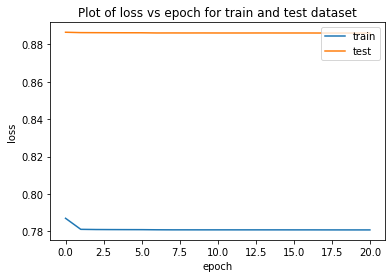

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/plots/ae_multi_loss.png')
plt.show()

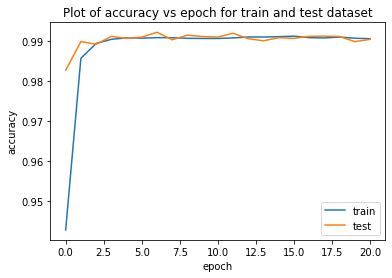

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/plots/ae_multi_accuracy.png')
plt.show()

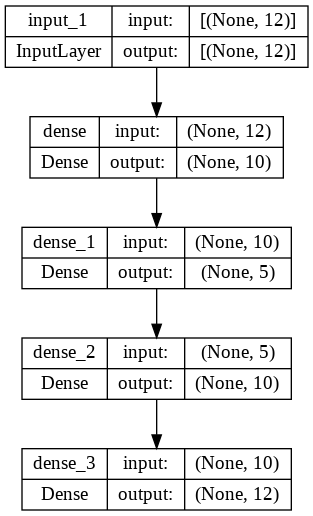

In [ ]:
plot_model(autoencoder, to_file='/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/plots/ae_multi.png', show_shapes=True,)

In [ ]:
predictions = autoencoder.predict(X_test)

65566/65566 [==============================] - 91s 1ms/step


# AE Classifier

In [ ]:
# i_dim = predictions.shape[1]

# #input layer
# i_layer = Input(shape=(i_dim, ))
# #hidden layer with 50 neurons
# fvector = Dense(5, activation="sigmoid")(i_layer)   
# #fvector = Dense(24, activation='tanh')(fvector)                 
# #doutput layer
# o_layer = Dense(5, activation='sigmoid')(fvector)

i_dim = predictions.shape[1]

#input layer
i_layer = Input(shape=(i_dim, ))
#hidden layer with 50 neurons
hidden_1 = Dense(10, activation='sigmoid')(i_layer)
h = Dense(5, activation='sigmoid')(hidden_1) 
#fvector = Dense(24, activation='tanh')(fvector)                 
#doutput layer
hidden_2 = Dense(10, activation='sigmoid')(h)
o_layer = Dense(5, activation='sigmoid')(hidden_2)

In [ ]:
# creating model with input, encoding, decoding, output layers
ae_classifier = Model(inputs=i_layer, outputs=o_layer)

# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_4 (Dense)             (None, 10)                130       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
 dense_6 (Dense)             (None, 10)                60        
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
# monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
#                         patience=5, verbose=1, mode='auto',
#                            restore_best_weights=True)
his = ae_classifier.fit(predictions, y_test, epochs=200, batch_size=700, validation_split=0.2).history


Epoch 1/200
2398/2398 [==============================] - 9s 3ms/step - loss: 0.0462 - accuracy: 0.8786 - val_loss: 0.0327 - val_accuracy: 0.8790
Epoch 2/200
2398/2398 [==============================] - 8s 3ms/step - loss: 0.0274 - accuracy: 0.9020 - val_loss: 0.0256 - val_accuracy: 0.9088
Epoch 3/200
2398/2398 [==============================] - 8s 3ms/step - loss: 0.0255 - accuracy: 0.9085 - val_loss: 0.0251 - val_accuracy: 0.9091
Epoch 4/200
2398/2398 [==============================] - 8s 3ms/step - loss: 0.0252 - accuracy: 0.9088 - val_loss: 0.0249 - val_accuracy: 0.9093
Epoch 5/200
2398/2398 [==============================] - 8s 3ms/step - loss: 0.0249 - accuracy: 0.9091 - val_loss: 0.0247 - val_accuracy: 0.9097
Epoch 6/200
2398/2398 [==============================] - 9s 4ms/step - loss: 0.0248 - accuracy: 0.9095 - val_loss: 0.0245 - val_accuracy: 0.9102
Epoch 7/200
2398/2398 [==============================] - 8s 3ms/step - loss: 0.0247 - accuracy: 0.9098 - val_loss: 0.0245 - val_ac

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/models/ae_classifier_multi.json'
weightspath = '/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/weights/ae_classifier_multi.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  ae_classifier_json = ae_classifier.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(ae_classifier_json)

  # serialize weights to HDF5
  ae_classifier.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  ae_classifier = model_from_json(loaded_model_json)

  # load weights into new model
  ae_classifier.load_weights(weightspath)
  print("Loaded model from disk")

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

65566/65566 [==============================] - 135s 2ms/step - loss: 0.0973 - accuracy: 0.8376
Test results - Loss: 0.09725290536880493 - Accuracy: 83.75897407531738%


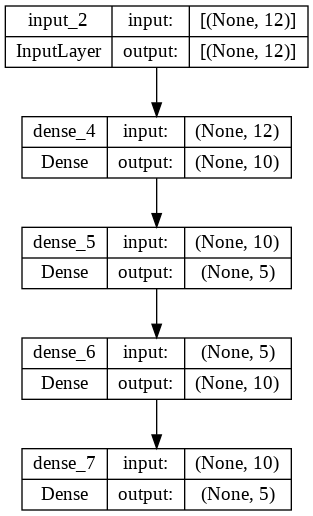

In [ ]:
# representation of model layers
plot_model(ae_classifier, to_file='/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/plots/ae_classifier_multi.png', show_shapes=True)

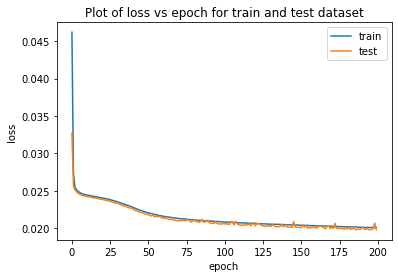

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/plots/ae_classifier_multi_loss.png')
plt.show()

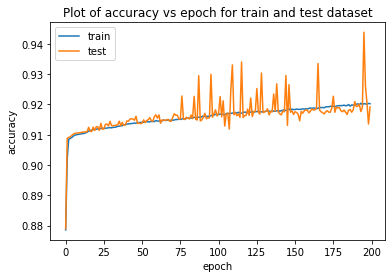

In [ ]:
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/plots/ae_classifier_multi_accuracy.png')
plt.show()

In [ ]:
n_classes = len(le2.classes_)
y_pred = ae_classifier.predict(X_test)

65566/65566 [==============================] - 91s 1ms/step


In [ ]:
fpr_ae = dict()
tpr_ae = dict()
roc_auc_ae = dict()
for i in range(n_classes):
    fpr_ae[i], tpr_ae[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc_ae[i] = auc(fpr_ae[i], tpr_ae[i])

In [ ]:
for j in range(0,y_pred.shape[1]):
  for i in range(0,y_pred.shape[0]):
    y_pred[i][j] = int(round(y_pred[i][j]))

In [ ]:
print("Recall Score - ",recall_score(y_test,y_pred.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,y_pred.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,y_pred.astype('uint8'),average='micro'))

Recall Score -  0.8721610028120681
F1 Score -  0.7819548133196504
Precision Score -  0.7086593345991923


In [ ]:
from sklearn.metrics import classification_report
attack_name = ["R2L","Dos","normal","Probe","U2R"]
print(classification_report(y_test, y_pred, target_names=attack_name, digits=4))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         R2L     0.0000    0.0000    0.0000     19562
         Dos     0.3347    1.0000    0.5016    162039
      normal     0.9884    0.8654    0.9228   1843516
       Probe     0.1498    0.9999    0.2606     72540
         U2R     0.0000    0.0000    0.0000       443

   micro avg     0.7087    0.8722    0.7820   2098100
   macro avg     0.2946    0.5731    0.3370   2098100
weighted avg     0.8995    0.8722    0.8586   2098100
 samples avg     0.8163    0.8722    0.8349   2098100

